In [1]:
import json
import pandas as pd

In [40]:
data_1 = None
data_2 = None
with open('../test_data.json', 'r') as f:
    data_1 = json.loads(json.load(f))
with open('../test_data_2.json', 'r') as f:
    data_2 = json.loads(json.load(f))

In [41]:
df1 = pd.DataFrame.from_dict(data_1)
df2 = pd.DataFrame.from_dict(data_2)

In [42]:
df1 = df1[df1['time'] <= 5000]
df2 = df2[df2['time'] <= 5000]

In [47]:
df2

,time,flow
0,1,0.00
1,12,0.14
2,23,0.40
3,34,0.91
4,45,1.37
...,...,...
450,4951,49.31
451,4962,49.03
452,4973,49.09
453,4984,49.06


<AxesSubplot:xlabel='time'>

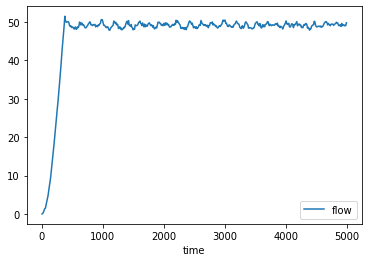

In [46]:
df2.plot(x='time',y='flow')